<a href="https://colab.research.google.com/github/palodavis/IA_RedesNeurais/blob/main/RedesNeuraisClassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Avaliação do APP Threads





Atributos:

*   source: Google Play ou AppStore.
*   review_description: Comentário de avaliação.
*   rating: Atributo alvo, contendo as classes de avaliação - 1 até 5.
*   review_date: Data do comentário.

Objetivo:


*   Fazer a classificação do APP: Classes 1,2,3,4 e 5.
*   Rótulos: Avaliação do APP.




# Tratamento dos dados

In [ ]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carregar o dataset
df = pd.read_csv("threads_reviews.csv")
print(df.shape)
df.head()

(32910, 4)


,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [ ]:
#Checar os valores nulos
df.isna().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [ ]:
# informações básicas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,rating
count,32910.000000
mean,3.398481
std,1.751480
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
# Converte as classes de avaliação
df['rating'] = df['rating'].map({1: 0, 2: 0, 3: 1, 4: 2, 5: 2})

In [ ]:
df = df.dropna()

# Gráfico de Distribuição da loja de Apps: Apple Store e Google Play

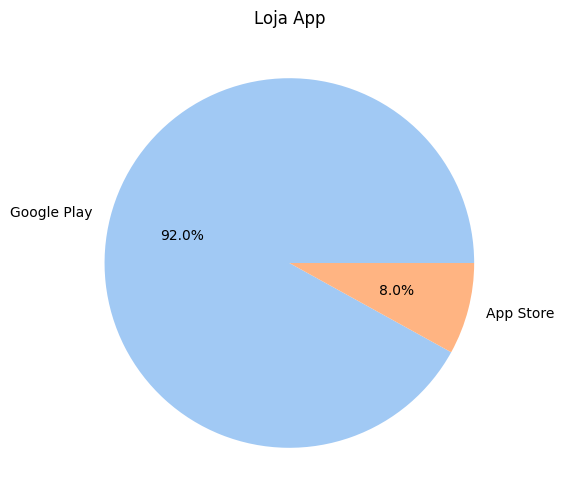

In [ ]:
source_counts = df['source'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Loja App')
plt.show()

# Gráfico de Avaliação - Verificando as classes desbanlaceadas do modelo

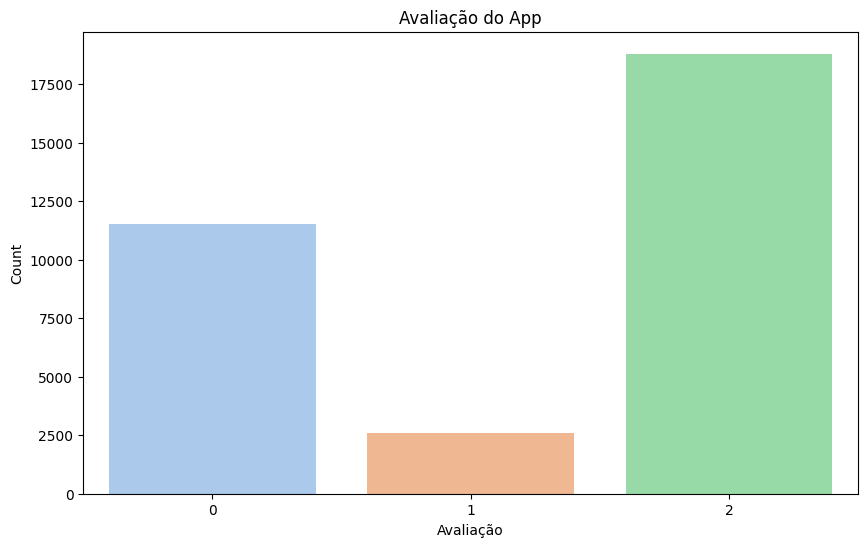

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x='rating', data=df, palette='pastel')
plt.xlabel("Avaliação")
plt.ylabel("Count")
plt.title("Avaliação do App")
plt.show()

# Gráfico de Distribuição da classificação

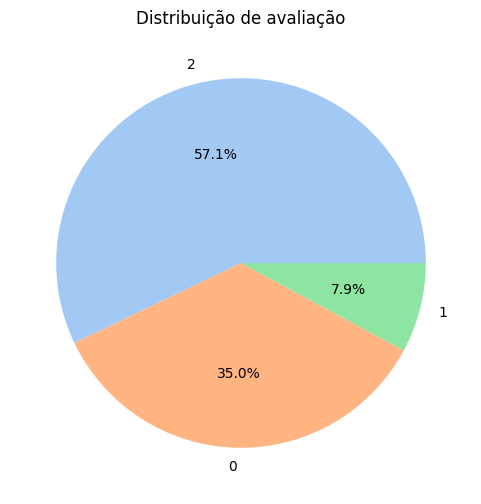

In [ ]:
rate = df["rating"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(rate, labels=rate.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribuição de avaliação')
plt.show()

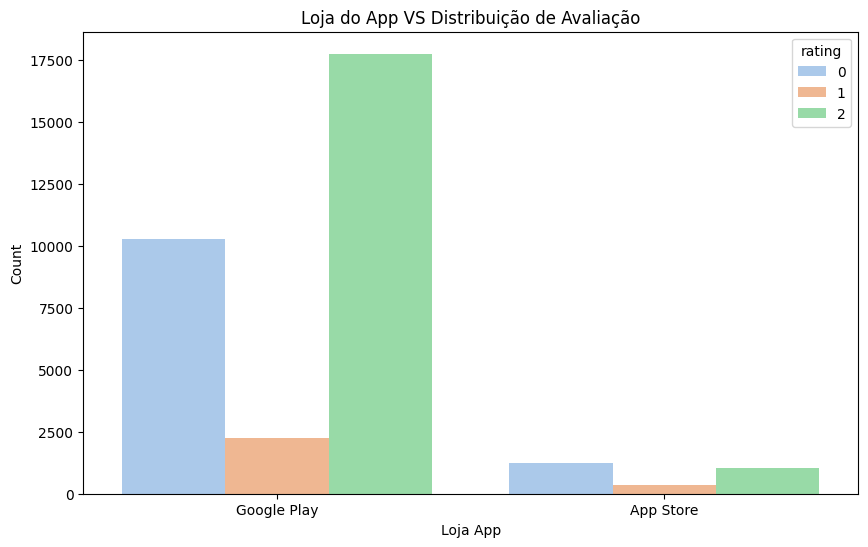

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x="source",hue='rating', data=df, palette='pastel')
plt.xlabel("Loja App")
plt.ylabel("Count")
plt.title("Loja do App VS Distribuição de Avaliação")
plt.show()

# WorldCloud

In [ ]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

sns.set(style="whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

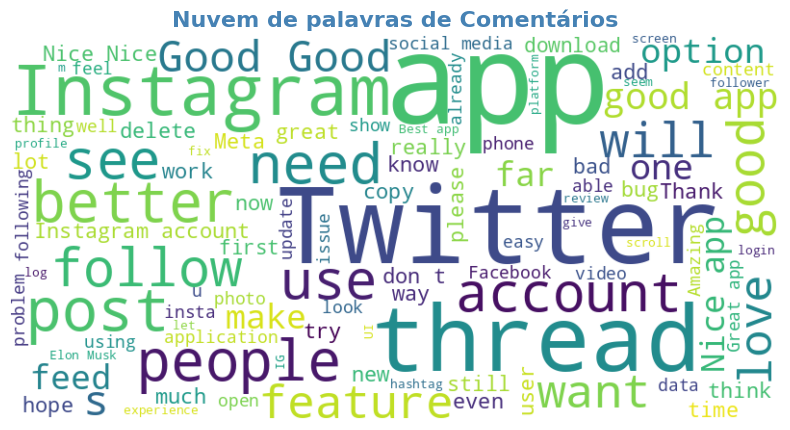

In [ ]:
text = ' '.join(df['review_description'])

custom_color_map = plt.cm.viridis

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=custom_color_map,
                      max_words=100, contour_width=3, contour_color='steelblue').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de palavras de Comentários', fontsize=16, fontweight='bold', color='steelblue')
plt.show()

#Bag-of-words


Primeiramente iremos fazer uma análise aplicando bag-of-words e verificando as palavras que aparecem com mais frequência

Bag-of-words:

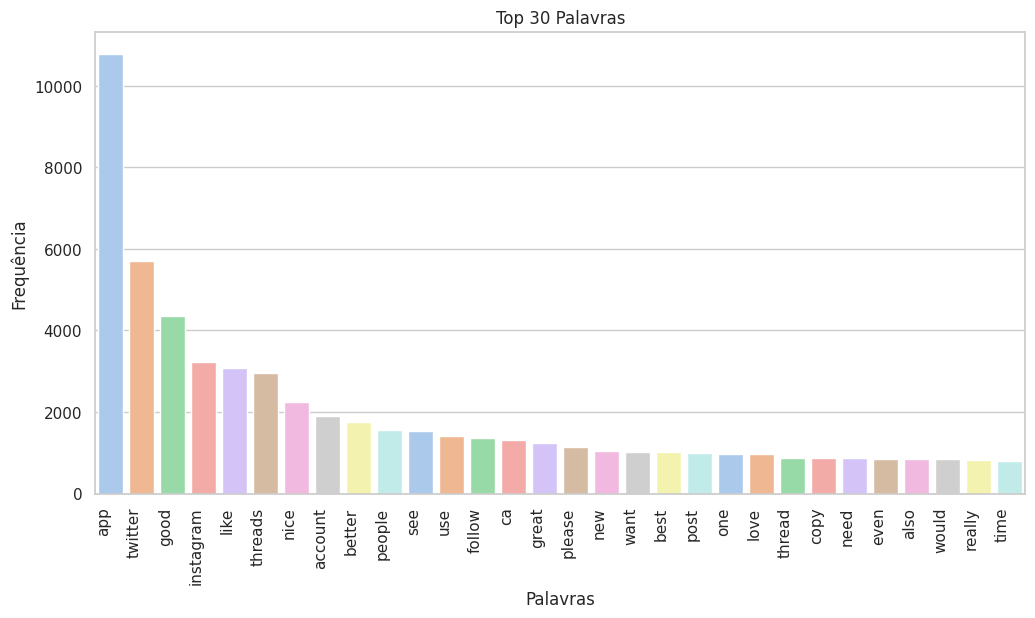

In [ ]:
#Remover palavras stop-words
def process(text):
    words = word_tokenize(text.lower())      # Lower case
    stop_words = set(stopwords.words('english'))   # stopwords in text
    words = [word for word in words if word.isalpha() and word not in stop_words]   # condition alphabet only and no stop words
    return words

reviews = ' '.join(df["review_description"])    # join data combine all reviews

data = process(reviews)
words = Counter(data)

#df['review_description'] = df['review_description'].apply(process)

# Verificar as top 30 palavras mais utilizadas
plt.figure(figsize=(12, 6))
sns.barplot(x=[word for word, count in words.most_common(30)], y=[count for word, count in words.most_common(30)],palette='pastel')
plt.title('Top 30 Palavras')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=90, ha='right')
plt.show()

# Pre processamento

In [ ]:
#Treinamento do modelo
from sklearn.model_selection import train_test_split
X = df['review_description']
y= df['rating']

#70% de treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#TF - IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Instanciar o objeto TF-IDF
vectorizer = TfidfVectorizer()

In [ ]:
# Constroi o vetorizador nos dados
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Converta as matrizes esparsas para matrizes densas
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

In [ ]:
#Imprimir o vocabulário
print(vectorizer.vocabulary_)

{'here': 5393, 'before': 1382, 'it': 6180, 'becomes': 1368, 'hit': 5464, 'app': 833, 'good': 5012, 'very': 12590, 'bad': 1161, 'experience': 4149, 'needs': 8097, 'instagram': 5953, 'account': 351, 'to': 11878, 'use': 12466, 'and': 725, 'if': 5672, 'you': 13153, 'create': 2831, 'an': 719, 'with': 12924, 'email': 3835, 'their': 11666, 'dumb': 3661, 'system': 11404, 'will': 12899, 'suspend': 11352, 'as': 944, 'boat': 1653, 'the': 11647, 'is': 6128, 'too': 11906, 'smooth': 10823, 'dm': 3493, 'should': 10614, 'be': 1347, 'introduced': 6066, 'also': 661, 'was': 12764, 'scrolling': 10344, 'on': 8431, 'my': 7962, 'feed': 4362, 'liking': 7045, 'posts': 9167, 'when': 12855, 'suddenly': 11247, 'got': 5046, 'banned': 1258, 'for': 4582, 'spam': 10957, 'despite': 3230, 'never': 8127, 'even': 4045, 'posting': 9163, 'only': 8445, 'tried': 12041, 'contest': 2671, 'ban': 1233, 'but': 1944, 'then': 11676, 'completely': 2545, 'froze': 4675, 'multiple': 7919, 'minutes': 7716, 'restarted': 9931, 'now': 8284

In [ ]:
#Matriz de pontuação do IDF
print(vectorizer.idf_)

[10.35175312  9.94628802 10.35175312 ... 10.35175312 10.35175312
 10.35175312]


In [ ]:
X_train_tfidf.shape

(23037, 15256)

In [ ]:
X_test_tfidf.shape

(9873, 15256)

# Redes Neurais

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.layers import BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l2  #regularizador L2
from keras.layers import Dropout  # Importe a camada de Dropout

import numpy as np

# Instantiate the model.
model = Sequential()

# Build the model.
model.add(Dense(128, activation="relu", input_dim=X_train_tfidf.shape[1]))
model.add(Dense(64, activation="relu", ))
model.add(Dense(3, activation="softmax"))

# Display the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1952896   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1961347 (7.48 MB)
Trainable params: 1961347 (7.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_tfidf, y_train, epochs=30, batch_size=32, validation_data=(X_test_tfidf, y_test))

Epoch 1/30
720/720 [==============================] - 16s 22ms/step - loss: 0.8995 - accuracy: 0.5703 - val_loss: 0.8626 - val_accuracy: 0.5704
Epoch 2/30
720/720 [==============================] - 20s 28ms/step - loss: 0.8435 - accuracy: 0.5722 - val_loss: 0.8186 - val_accuracy: 0.5711
Epoch 3/30
720/720 [==============================] - 17s 24ms/step - loss: 0.7864 - accuracy: 0.6423 - val_loss: 0.7545 - val_accuracy: 0.6958
Epoch 4/30
720/720 [==============================] - 10s 14ms/step - loss: 0.7212 - accuracy: 0.7233 - val_loss: 0.6966 - val_accuracy: 0.7392
Epoch 5/30
720/720 [==============================] - 10s 14ms/step - loss: 0.6691 - accuracy: 0.7533 - val_loss: 0.6572 - val_accuracy: 0.7624
Epoch 6/30
720/720 [==============================] - 12s 16ms/step - loss: 0.6320 - accuracy: 0.7710 - val_loss: 0.6304 - val_accuracy: 0.7765
Epoch 7/30
720/720 [==============================] - 12s 16ms/step - loss: 0.6051 - accuracy: 0.7836 - val_loss: 0.6112 - val_accuracy:

In [ ]:
previsoes = model.predict(X_test_tfidf)

# Converta as previsões para classes
y_pred_classes = previsoes.argmax(axis=-1)

309/309 [==============================] - 2s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_test, y_pred_classes)

0.8064418109996961

# Gráfico com e sem Batch Normalization

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.layers import BatchNormalization
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Criar função com batch normalization
def create_model_with_batch_normalization(input_dim):
    model = Sequential()
    model.add(Dense(128, activation="relu", input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(Dense(64, activation="relu" ))
    model.add(BatchNormalization())
    model.add(Dense(3, activation="softmax"))
    return model


# Criar função sem o batch normalization
def create_model_without_batch_normalization(input_dim):
    model = Sequential()
    model.add(Dense(128, activation="relu", input_dim=input_dim))
    model.add(Dense(64, activation="relu" ))
    model.add(Dense(3, activation="softmax"))
    return model

def plot_loss_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

309/309 [==============================] - 2s 5ms/step
Accuracy Batch Normalization: 0.7654208447280462


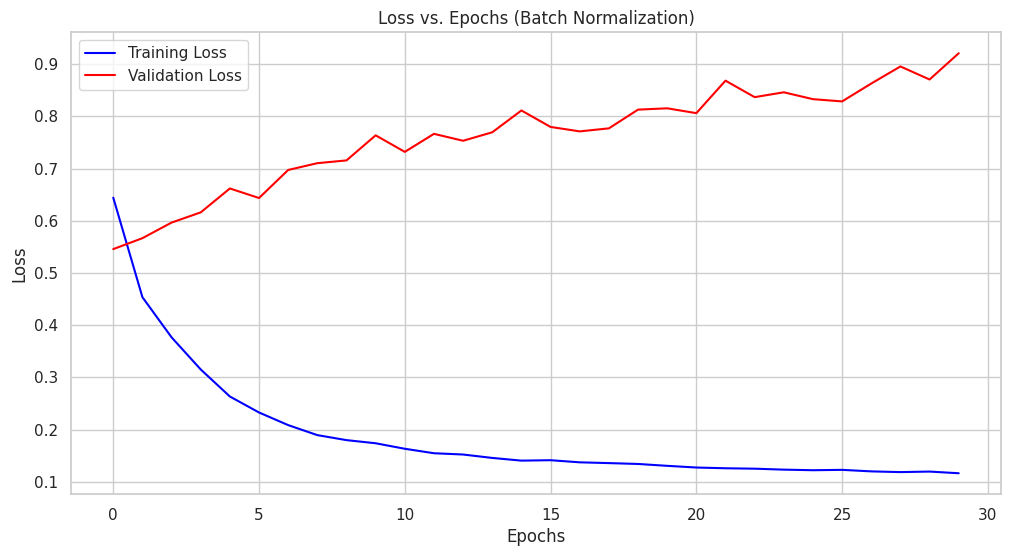

In [ ]:
# Criar o modelo com Batch Normalization
model_with_bn = create_model_with_batch_normalization(X_train_tfidf.shape[1])

# Compilar o model.
model_with_bn.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo com Batch Normalization
history_with_bn = model_with_bn.fit(X_train_tfidf, y_train, epochs=30, batch_size=32, validation_data=(X_test_tfidf, y_test), verbose=0)

previsoes = model_with_bn.predict(X_test_tfidf)
# Converta as previsões para classes
y_pred_classes = previsoes.argmax(axis=-1)
acc_bn = accuracy_score(y_test, y_pred_classes)
print("Accuracy Batch Normalization:", acc_bn)

# Plotar o gráfico de loss
plot_loss_history(history_with_bn, 'Loss vs. Epochs (Batch Normalization)')

309/309 [==============================] - 2s 5ms/step
Accuracy Batch Normalization: 0.8025929302137141


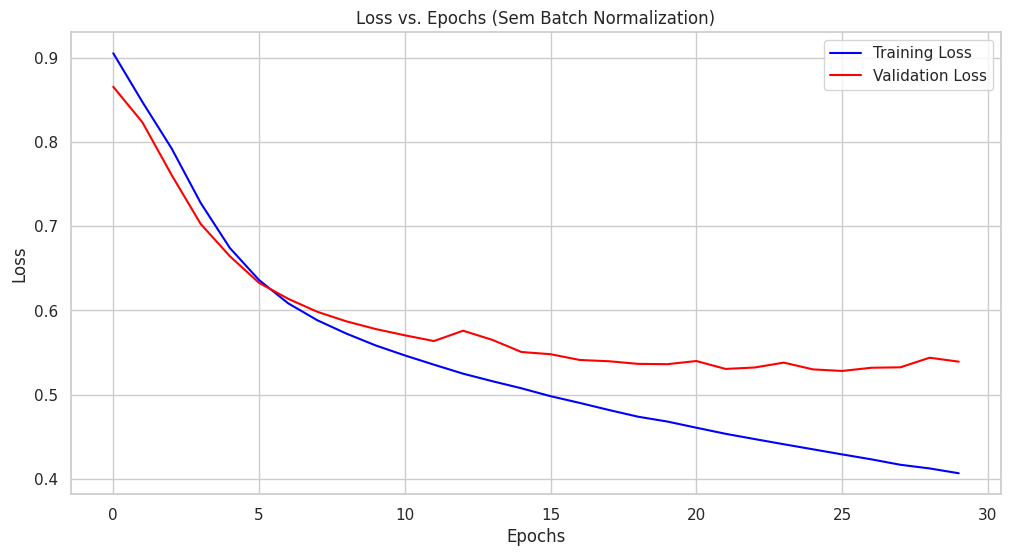

In [ ]:
# Criar o modelo sem Batch Normalization
model_without_bn = create_model_without_batch_normalization(X_train_tfidf.shape[1])

# Compilar modelo.
model_without_bn.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo sem Batch Normalization
history_without_bn = model_without_bn.fit(X_train_tfidf, y_train, epochs=30, batch_size=32, validation_data=(X_test_tfidf, y_test), verbose=0)

previsoesSbn = model_without_bn.predict(X_test_tfidf)
# Converta as previsões para classes
y_pred_classes = previsoesSbn.argmax(axis=-1)
acc_sbn = accuracy_score(y_test, y_pred_classes)
print("Accuracy Batch Normalization:", acc_sbn)

# Plotar o gráfico de loss
plot_loss_history(history_without_bn, 'Loss vs. Epochs (Sem Batch Normalization)')

# Gráfico com e sem os Pesos Glorot

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.layers import BatchNormalization
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Com glorot
def create_model_with_glorot(input_dim):
    model = Sequential()
    model.add(Dense(128, activation="relu", kernel_initializer='glorot_normal',input_dim=input_dim))
    model.add(Dense(64, activation="relu", kernel_initializer='glorot_normal', ))
    model.add(Dense(3, activation="softmax", kernel_initializer='glorot_normal',))
    return model

# Sem glorot
def create_model_without_glorot(input_dim):
    model = Sequential()
    model.add(Dense(128, activation="relu", kernel_initializer='glorot_normal',input_dim=input_dim))
    model.add(Dense(64, activation="relu", kernel_initializer='glorot_normal', ))
    model.add(Dense(3, activation="softmax", kernel_initializer='glorot_normal',))
    return model

def plot_loss_history2(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

309/309 [==============================] - 3s 8ms/step
Accuracy com Glorot: 0.8063405246632229


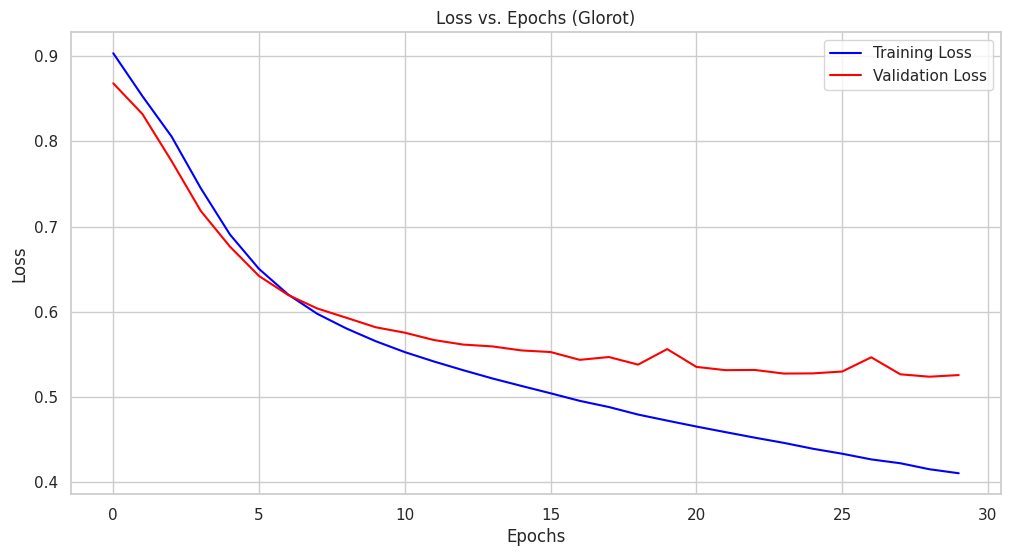

In [ ]:
# Criar o modelo com Glorot
model_with_glorot = create_model_with_glorot(X_train_tfidf.shape[1])

# Compilar o model.
model_with_glorot.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']),

# Treinar o modelo com Glorot
history_with_glorot = model_with_glorot.fit(X_train_tfidf, y_train, epochs=30, batch_size=32, validation_data=(X_test_tfidf, y_test), verbose=0)

previsoesGlorot = model_with_glorot.predict(X_test_tfidf)
# Converta as previsões para classes
y_pred_classes = previsoesGlorot.argmax(axis=-1)
acc_glorot = accuracy_score(y_test, y_pred_classes)
print("Accuracy com Glorot:", acc_glorot)

# Plotar o gráfico de loss
plot_loss_history2(history_with_glorot, 'Loss vs. Epochs (Glorot)')

309/309 [==============================] - 2s 6ms/step
Accuracy sem Glorot: 0.8079611060467943


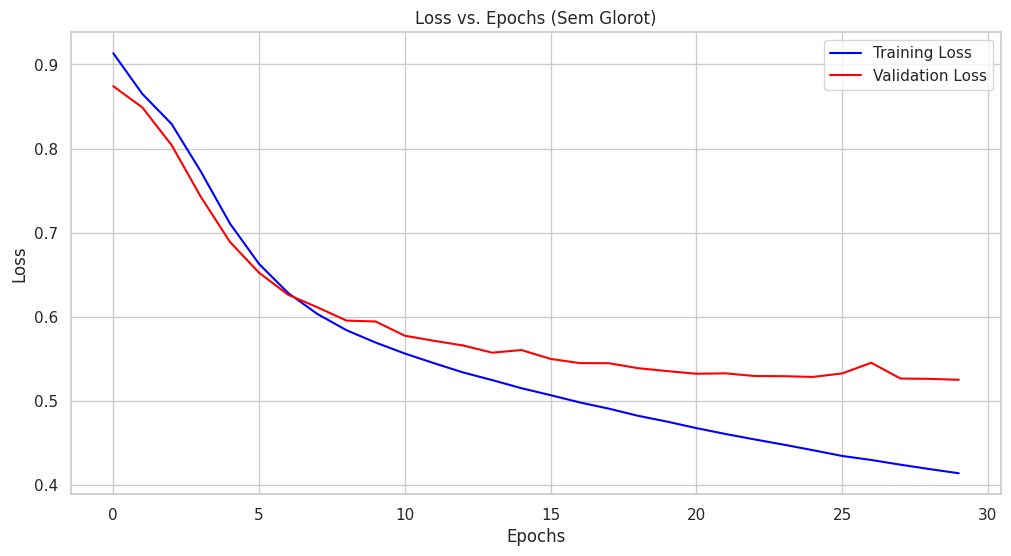

In [ ]:
# Criar o modelo com Glorot
model_without_glorot = create_model_without_glorot(X_train_tfidf.shape[1])

# Compilar o model.
model_without_glorot.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']),

# Treinar o modelo com Glorot
history_without_glorot = model_without_glorot.fit(X_train_tfidf, y_train, epochs=30, batch_size=32, validation_data=(X_test_tfidf, y_test), verbose=0)

previsoeNoGlorot = model_without_glorot.predict(X_test_tfidf)
# Converta as previsões para classes
y_pred_classes = previsoeNoGlorot.argmax(axis=-1)
acc_noGlorot = accuracy_score(y_test, y_pred_classes)
print("Accuracy sem Glorot:", acc_noGlorot)

# Plotar o gráfico de loss
plot_loss_history2(history_without_glorot, 'Loss vs. Epochs (Sem Glorot)')

# Gráfico com Power Scheduling e Exponencial Scheduling

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.layers import BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l2  #regularizador L2
from keras.layers import Dropout  # Importe a camada de Dropout

import numpy as np

# Função para agendamento exponencial da taxa de aprendizado
def exponential_decay(epoch, lr):
    initial_lr = 0.01  # Taxa de aprendizado inicial
    decay_rate = 0.9  # Taxa de decaimento
    decay_step = 10  # Número de épocas por etapa de decaimento
    return initial_lr * (decay_rate ** (epoch // decay_step))

# Função para agendamento de taxa de aprendizado com Power Scheduling
def power_decay(epoch):
    initial_lr = 0.01  # Taxa de aprendizado inicial
    power = 0.5  # Expoente da função de potência
    return initial_lr * (1.0 / (1.0 + power * epoch))

def plot_loss_history_sheduler(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

# Instantiate the model.
model = Sequential()

# Build the model.
model.add(Dense(128, activation="relu", input_dim=X_train_tfidf.shape[1]))
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))

# Display the model summary.
model.summary()

# Crie o callback para agendamento de taxa de aprendizado
lr_callback_exponential = LearningRateScheduler(exponential_decay, verbose=0)

# Crie o callback para agendamento de taxa de aprendizado com Power Scheduling
lr_callback_power = LearningRateScheduler(power_decay, verbose=0)

NameError: ignored

In [ ]:
# Compilar o model.
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']),


history_power = model.fit(X_train_tfidf, y_train, batch_size = 32, epochs = 30, validation_data=(X_test_tfidf, y_test), callbacks=[lr_callback_power], verbose=0)

previsoesPower = model.predict(X_test_tfidf)
# Converta as previsões para classes
y_pred_classes = previsoesPower.argmax(axis=-1)
acc_power = accuracy_score(y_test, y_pred_classes)
print("Accuracy Power Scheduler:", acc_power)

plot_loss_history_sheduler(history_power, 'Loss vs. Epochs (Power Sheduling)')

In [ ]:
# Compilar o model.
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy']),


history_exponential = model.fit(X_train_tfidf, y_train, batch_size = 32, epochs = 30, validation_data=(X_test_tfidf, y_test), callbacks=[lr_callback_power], verbose=0)

previsoesExpo = model.predict(X_test_tfidf)
# Converta as previsões para classes
y_pred_classes = previsoesExpo.argmax(axis=-1)
acc_Expo = accuracy_score(y_test, y_pred_classes)
print("Accuracy Power Scheduler:", acc_Expo)

plot_loss_history_sheduler(history_exponential, 'Loss vs. Epochs (Exponential Sheduling)')

# Gráfico com Power Scheduling e Exponencial Scheduling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

# Importações do TensorFlow
import tensorflow as tf
from tensorflow import keras

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.layers import BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l2  #regularizador L2
from keras.layers import Dropout  # Importe a camada de Dropout

# Função para agendamento exponencial da taxa de aprendizado
def exponential_decay(epoch, lr):
    initial_lr = 0.01  # Taxa de aprendizado inicial
    decay_rate = 0.9  # Taxa de decaimento
    decay_step = 10  # Número de épocas por etapa de decaimento
    return initial_lr * (decay_rate ** (epoch // decay_step))

# Função para agendamento de taxa de aprendizado com Power Scheduling
def power_decay(epoch):
    initial_lr = 0.01  # Taxa de aprendizado inicial
    power = 0.5  # Expoente da função de potência
    return initial_lr * (1.0 / (1.0 + power * epoch))

def plot_loss_history_scheduler(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.plot(loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()


def build_model_scheduler():
  model_scheduler = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_tfidf.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ])
  model_scheduler.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])
  return model_scheduler

# Crie o callback para agendamento de taxa de aprendizado
lr_callback_exponential = LearningRateScheduler(exponential_decay, verbose=0)

# Crie o callback para agendamento de taxa de aprendizado com Power Scheduling
lr_callback_power = LearningRateScheduler(power_decay, verbose=0)

309/309 [==============================] - 2s 6ms/step
Accuracy Power Scheduler: 0.7649144130456801


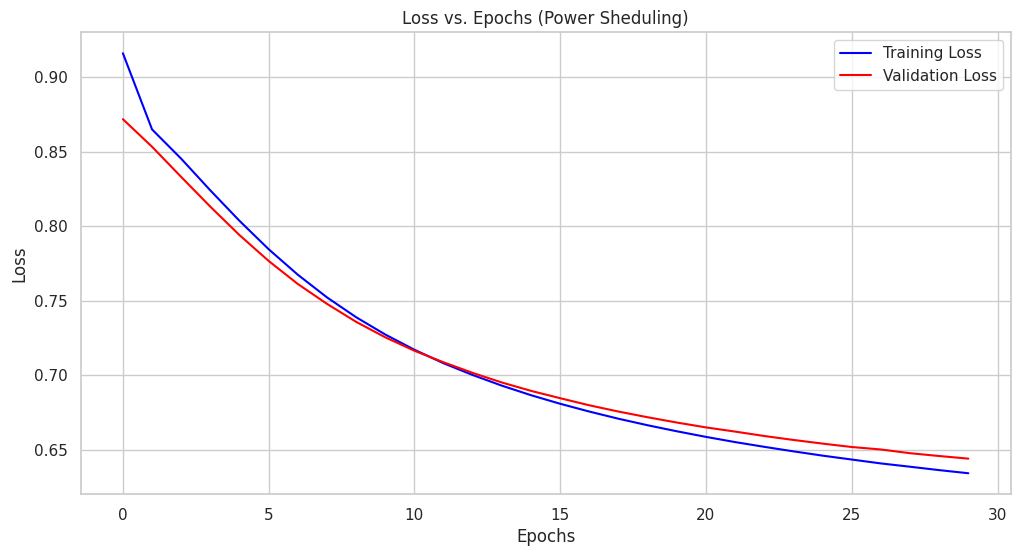

In [ ]:
# Compilar o model.
model_scheduler = build_model_scheduler()

history_power = model_scheduler.fit(X_train_tfidf, y_train, batch_size = 32, epochs = 30, validation_data=(X_test_tfidf, y_test), callbacks=[lr_callback_power], verbose=0)

previsoesPower = model_scheduler.predict(X_test_tfidf)
# Converta as previsões para classes
y_pred_classes = previsoesPower.argmax(axis=-1)
acc_power = accuracy_score(y_test, y_pred_classes)
print("Accuracy Power Scheduler:", acc_power)

plot_loss_history_scheduler(history_power, 'Loss vs. Epochs (Power Sheduling)')

In [ ]:
# Compilar o model.
model_scheduler = build_model_scheduler()

history_exponential = model_scheduler.fit(X_train_tfidf, y_train, batch_size = 32, epochs = 30, validation_data=(X_test_tfidf, y_test), callbacks=[lr_callback_exponential], verbose=0)

previsoesExpo = model_scheduler.predict(X_test_tfidf)
# Converta as previsões para classes
y_pred_classes = previsoesExpo.argmax(axis=-1)
acc_Expo = accuracy_score(y_test, y_pred_classes)
print("Accuracy Power Scheduler:", acc_Expo)

plot_loss_history_scheduler(history_exponential, 'Loss vs. Epochs (Exponential Sheduling)')